In [1]:
import numpy as np
import pandas as pd

import seaborn as sns

import numpy as np
import pandas as pd

from random import random, uniform
from io import StringIO

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.lib.pretty import pretty, pprint

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
datastr = StringIO("""
Line	Label	Ingredients	Berries	Speciatly	BaseHelp	Use
Pichu	08/08 Pichu 3	1	8	B	2.5222	1
Squirtle	08/09 Squirtle 1	3	4	I	2.4000	1
Raichu	08/11 Raichu 12	3	19	B	5.5788	1
Houndour	08/11 Houndour 7	1	7	B	2.0281	1
Mankey	08/11 Mankey 10	1	9	B	2.6188	1
Ivysaur	08/11 Ivysaur 13	4	6	I	3.3540	1
Ivysaur	08/14 Ivysaur 12	4	6	I	3.8916	1
Dugtrio	08/14 Dugtrio 11	4	8	I	4.3732	1
Wartortle	08/14 Wartortle 12	5	6	I	3.7769	1
Larvitar	08/14 Larvitar 7	2	4	I	2.2775	1
Charmander	08/14 Charmander 9	3	6	I	3.4843	1
Ivysaur	08/15 Ivysaur 12	4	6	I	3.8916	1
Dugtrio	08/15 Dugtrio 12	4	8	I	4.3828	1
Wartortle	08/15 Wartortle 12	5	6	I	3.7769	1
Gastly	08/15 Gastly 7	2	5	I	2.8769	1
Larvitar	08/15 Larvitar 7	2	4	I	2.2775	1
Squirtle	08/14 Squirtle 10	3	4	I	2.4440	1
Squirtle	08/15 Squirtle 10	3	4	I	2.4440	1
Butterfree	08/15 Butterfree 10	2	15	B	4.2303	1
Wigglytuff	08/17 Wigglytuff 13	1	7	S	3.7305	1
Pikachu	08/17 Pikachu 13	2	15	B	4.5541	1
Riolu	08/21 Riolu 6	1	5	S	2.5974	1
Geodude	08/21 Geodude 4	2	3	I	1.9064	1
Bellsprout	08/21 Bellsprout 7	2	4	I	2.1024	1
Eevee	08/21 Eevee 4	1	6	S	3.2635	1
Charmeleon	08/21 Charmeleon 12	5	8	I	4.7558	1
""")

data = pd.read_csv(datastr, sep='\t', header=0)
data = data.set_index (["Line","Label"])
data.sort_index(axis=0, ascending=True, inplace=True)
data.head(30)

Ingredients  Berries Speciatly  BaseHelp  Use
Line       Label                                                             
Bellsprout 08/21 Bellsprout 7             2        4         I    2.1024    1
Butterfree 08/15 Butterfree 10            2       15         B    4.2303    1
Charmander 08/14 Charmander 9             3        6         I    3.4843    1
Charmeleon 08/21 Charmeleon 12            5        8         I    4.7558    1
Dugtrio    08/14 Dugtrio 11               4        8         I    4.3732    1
           08/15 Dugtrio 12               4        8         I    4.3828    1
Eevee      08/21 Eevee 4                  1        6         S    3.2635    1
Gastly     08/15 Gastly 7                 2        5         I    2.8769    1
Geodude    08/21 Geodude 4                2        3         I    1.9064    1
Houndour   08/11 Houndour 7               1        7         B    2.0281    1
Ivysaur    08/11 Ivysaur 13               4        6         I    3.3540    1
           08/14 Ivysaur 12               4        6         I    3.8916    1
           08/15 Ivysaur 12               4        6         I    3.8916    1
Larvitar   08/14 Larvitar 7               2        4         I    2.2775    1
           08/15 Larvitar 7               2        4         I    2.2775    1
Mankey     08/11 Mankey 10                1        9         B    2.6188    1
Pichu      08/08 Pichu 3                  1        8         B    2.5222    1
Pikachu    08/17 Pikachu 13               2       15         B    4.5541    1
Raichu     08/11 Raichu 12                3       19         B    5.5788    1
Riolu      08/21 Riolu 6                  1        5         S    2.5974    1
Squirtle   08/09 Squirtle 1               3        4         I    2.4000    1
           08/14 Squirtle 10              3        4         I    2.4440    1
           08/15 Squirtle 10              3        4         I    2.4440    1
Wartortle  08/14 Wartortle 12             5        6         I    3.7769    1
           08/15 Wartortle 12             5        6         I    3.7769    1
Wigglytuff 08/17 Wigglytuff 13            1        7         S    3.7305    1

In [3]:
def validate(item, ingredient_fraction, energy_m):
    berryBonus = 2 if item["Speciatly"] == 'B' else 1
    ingBonus = 2 if item["Speciatly"] == 'I' else 1

    ing = int(round(item["BaseHelp"]*energy_m*ingredient_fraction*ingBonus))
    ber = int(round(item["BaseHelp"]*energy_m*(1-ingredient_fraction)*berryBonus))

    return 1.0 if ing == int(item["Ingredients"]) and ber == int(item["Berries"]) else 0.0
    

In [4]:

recompute = False
nb_samples = 100000

if recompute:

    # extract unique evolution lines
    species = list(data.index.get_level_values(0).unique())
    
    # reshape the data once so we don't have to repeat the filter query for each random sample.
    obs_by_spec = dict(
        [ (name, list(map(lambda x:  x._asdict(), data.loc[name].itertuples() )))  for name in species ]
    ) 
    
    
    
    # setup storage, list are much faster to grow than dataframe.
    rnd_trials_list = []
    rnd_params_list = []

    for index_trial in range(0,nb_samples):

        ingredient_fraction = uniform(0, 0.5)
        energy_m = uniform(1.5, 3.0)

        results = []

        for sp in species:
            
            obs = obs_by_spec[sp]
            res = 1

            for item in obs:
                
                res *= validate(item, ingredient_fraction, energy_m)
                if(res == 0): 
                    break;

            results.append(res)
 
        if(sum(results) == 0): 
            continue

        rnd_trials_list.append(results)
        rnd_params_list.append([ingredient_fraction,energy_m])

        
    #convert list to dataframe
    rnd_trials = pd.DataFrame(rnd_trials_list, columns = species)
    rnd_params = pd.DataFrame(rnd_params_list, columns = ["ingredient%","energy_m"])
    

    rnd_params.to_pickle('./saved/rnd_params.pickle')
    rnd_trials.to_pickle('./saved/rnd_trials.pickle')
    

else:
    
    rnd_params = pd.read_pickle('./saved/rnd_params.pickle')
    rnd_trials = pd.read_pickle('./saved/rnd_trials.pickle')

In [5]:
rnd_trials.describe()
rnd_params.describe()

,Bellsprout,Butterfree,Charmander,Charmeleon,Dugtrio,Eevee,Gastly,Geodude,Houndour,Ivysaur,Larvitar,Mankey,Pichu,Pikachu,Raichu,Riolu,Squirtle,Wartortle,Wigglytuff
count,112049.000000,112049.000000,112049.000000,112049.000000,112049.000000,112049.000000,112049.000000,112049.000000,112049.000000,112049.000000,112049.000000,112049.00000,112049.000000,112049.000000,112049.000000,112049.000000,112049.000000,112049.000000,112049.000000
mean,0.332622,0.112067,0.163446,0.088649,0.100295,0.332542,0.189569,0.388598,0.426688,0.006979,0.354274,0.23222,0.153290,0.089738,0.063660,0.495685,0.286785,0.137270,0.265161
std,0.471155,0.315450,0.369774,0.284237,0.300395,0.471126,0.391962,0.487434,0.494598,0.083249,0.478295,0.42225,0.360268,0.285807,0.244147,0.499984,0.452262,0.344134,0.441421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


,ingredient%,energy_m
count,112049.000000,112049.000000
mean,0.201937,2.228626
std,0.067760,0.138341
min,0.062561,2.000017
25%,0.146995,2.110494
50%,0.203055,2.221840
75%,0.259609,2.341676
max,0.332991,2.499998


In [6]:
def get_valid_params(cols):

    df = rnd_trials[cols].copy()
    df = df.loc[(df!=0).all(axis=1)]
    return rnd_params.loc[df.index]


In [35]:
from scipy.spatial import ConvexHull
from matplotlib.path import Path
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection


def plot_hull(df, ax, name, **kwargs):
    
    points = df[["ingredient%", "energy_m"]].to_numpy()
    hull = ConvexHull(points)
    hullpts = points[hull.vertices,:]
    
    patch = Polygon(hullpts, closed=True, label=name, **kwargs)
    collection = PatchCollection([patch], **kwargs)
    ax.add_collection(collection, autolim=True)
    
    return patch
    
    
    

In [8]:
def plot_group(cols, samples=None):
    
    if(samples is None):
        samples = get_valid_params(cols)
    
    # Standard scale to compare cluster.
    
    fig, ax = plt.subplots()
    #sns.scatterplot(data=samples,y="energy_m", x="ingredient%", alpha=0.8, ax=ax)
    plt.xlabel("Ingredient %",fontweight ='bold', size=14)
    plt.ylabel("Production Boost (M)", fontweight ='bold',size=14)
    name = " ".join(cols)
    plt.title(name)
    ax.set_xlim(0, 0.5)
    ax.set_ylim(1.5, 3)

    _ = plot_hull(pts,ax, name, alpha=0.8)
    
    display(fig)
    plt.close()
    


,ingredient%,energy_m
count,37270.000000,37270.000000
mean,0.200314,2.307119
std,0.027408,0.114966
min,0.143043,2.024643
25%,0.178239,2.220887
50%,0.198755,2.311591
75%,0.222240,2.403241
max,0.262707,2.499998


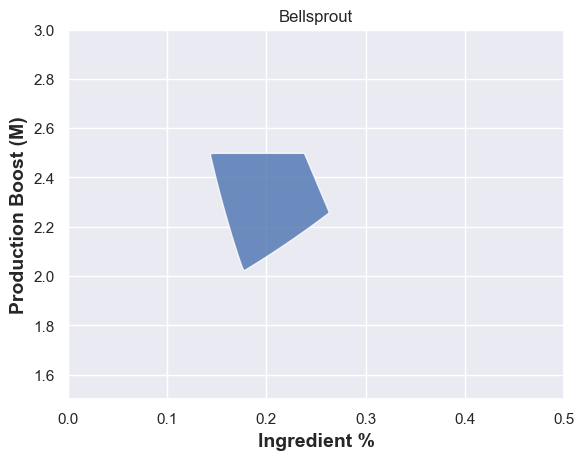

,ingredient%,energy_m
count,12557.000000,12557.000000
mean,0.209209,2.243299
std,0.024151,0.076052
min,0.162557,2.073324
25%,0.188582,2.183398
50%,0.209324,2.242553
75%,0.229899,2.301631
max,0.256007,2.420751


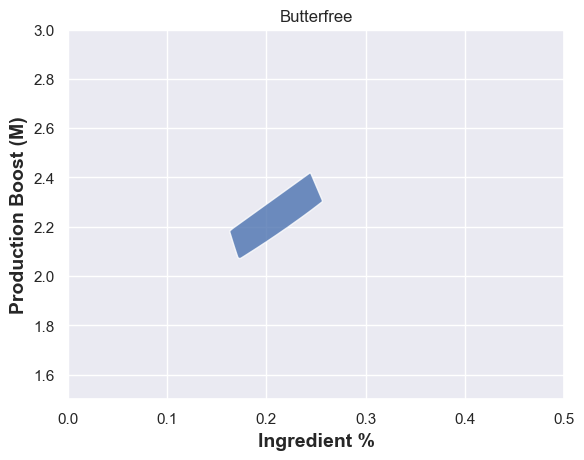

,ingredient%,energy_m
count,18314.000000,18314.000000
mean,0.200419,2.158012
std,0.017476,0.085385
min,0.161621,2.000183
25%,0.186510,2.088773
50%,0.201014,2.155074
75%,0.213795,2.223983
max,0.240510,2.365562


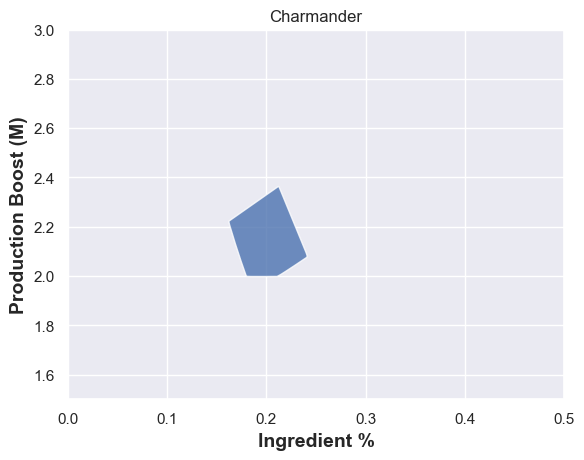

,ingredient%,energy_m
count,9933.000000,9933.000000
mean,0.238178,2.206371
std,0.012322,0.067475
min,0.209649,2.052831
25%,0.228792,2.152865
50%,0.238069,2.206715
75%,0.247196,2.258203
max,0.267936,2.362081


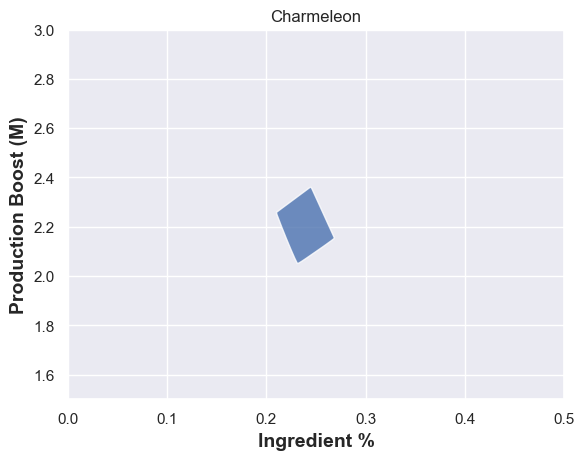

,ingredient%,energy_m
count,11238.000000,11238.000000
mean,0.199988,2.281169
std,0.012801,0.072289
min,0.171347,2.117812
25%,0.190059,2.225638
50%,0.199963,2.280504
75%,0.209816,2.336963
max,0.230051,2.450996


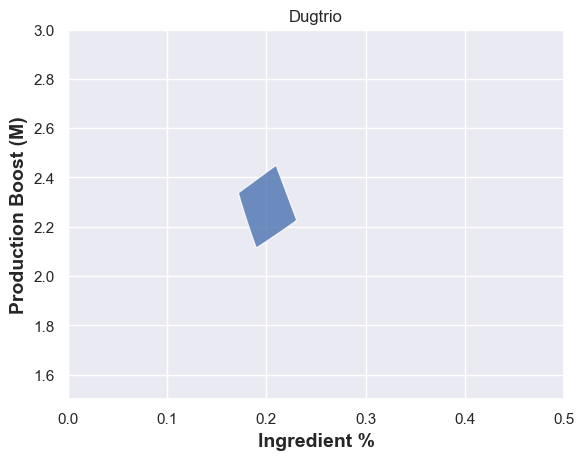

,ingredient%,energy_m
count,37261.000000,37261.000000
mean,0.146800,2.172269
std,0.035106,0.101809
min,0.071497,2.000023
25%,0.119336,2.092304
50%,0.150621,2.161789
75%,0.176021,2.244255
max,0.213437,2.448543


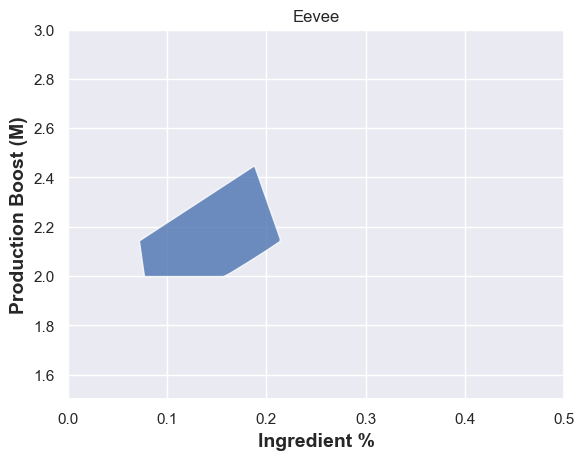

,ingredient%,energy_m
count,21241.000000,21241.000000
mean,0.167443,2.131943
std,0.022365,0.082403
min,0.120179,2.000017
25%,0.149631,2.062001
50%,0.168760,2.126108
75%,0.185160,2.192833
max,0.216936,2.345022


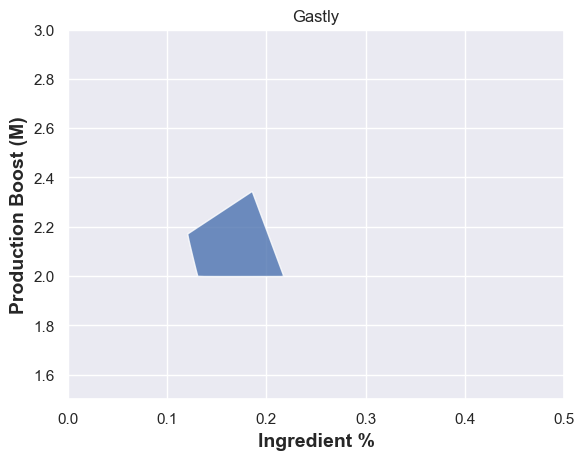

,ingredient%,energy_m
count,43542.000000,43542.000000
mean,0.247040,2.182074
std,0.033124,0.116131
min,0.176906,2.000017
25%,0.220914,2.083901
50%,0.248026,2.171584
75%,0.271521,2.266309
max,0.327110,2.489371


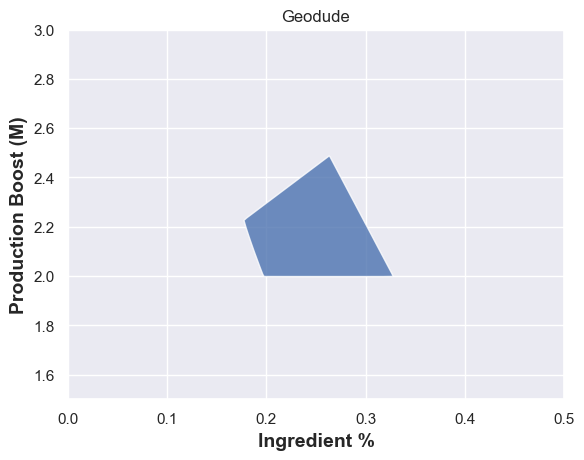

,ingredient%,energy_m
count,47810.000000,47810.000000
mean,0.221731,2.228453
std,0.047724,0.130756
min,0.117830,2.000017
25%,0.185460,2.118786
50%,0.224148,2.222412
75%,0.260385,2.333538
max,0.315674,2.499981


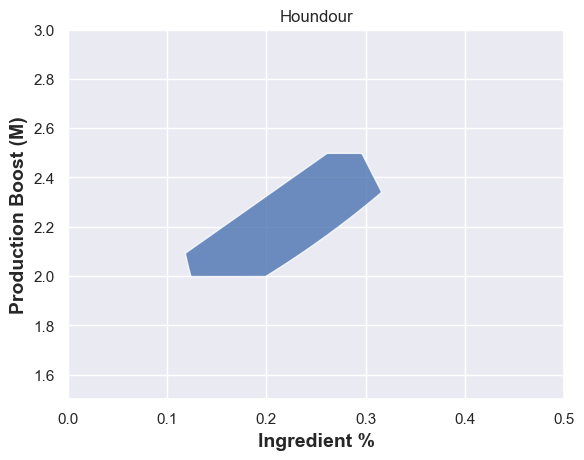

,ingredient%,energy_m
count,782.000000,782.000000
mean,0.249547,2.205824
std,0.005593,0.018490
min,0.238776,2.163876
25%,0.244994,2.191210
50%,0.249392,2.206522
75%,0.254309,2.220242
max,0.260289,2.248158


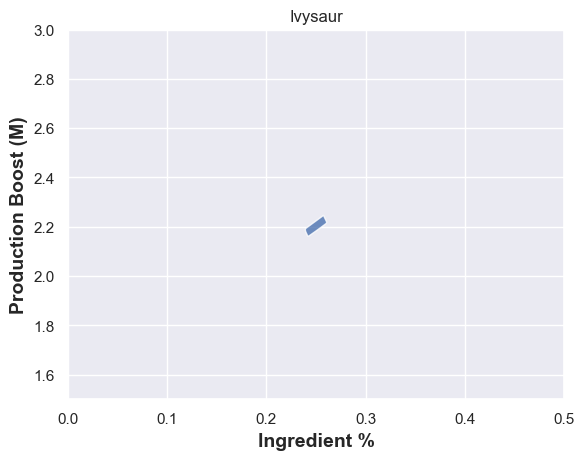

,ingredient%,energy_m
count,39696.000000,39696.000000
mean,0.201031,2.211578
std,0.026758,0.123061
min,0.143534,2.000038
25%,0.179567,2.109039
50%,0.201895,2.205626
75%,0.221789,2.306158
max,0.262587,2.499845


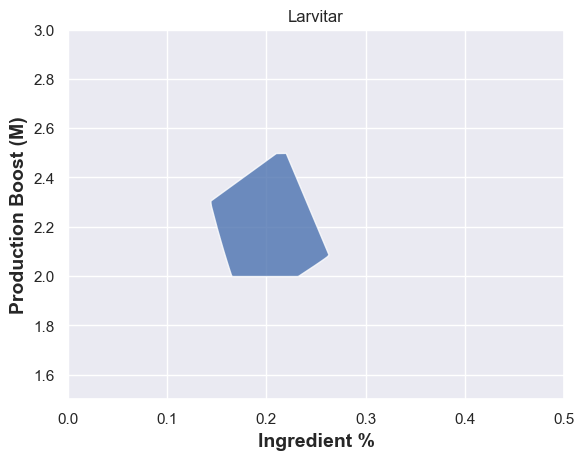

,ingredient%,energy_m
count,26020.000000,26020.000000
mean,0.193809,2.146874
std,0.036783,0.091612
min,0.095403,2.000017
25%,0.167682,2.069360
50%,0.197598,2.140627
75%,0.224184,2.215635
max,0.260690,2.384097


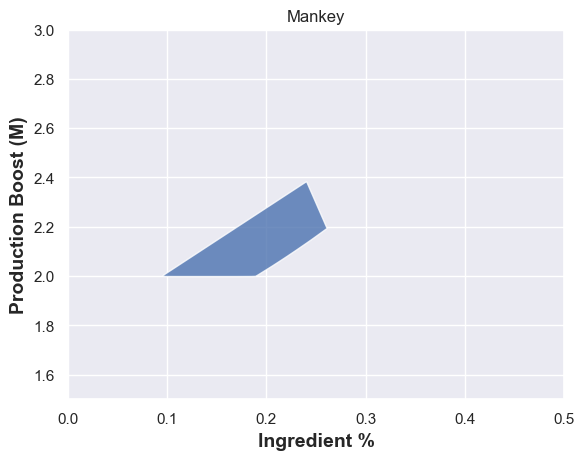

,ingredient%,energy_m
count,17176.000000,17176.000000
mean,0.235092,2.097358
std,0.027210,0.065247
min,0.159799,2.000017
25%,0.216536,2.043051
50%,0.239264,2.087871
75%,0.257065,2.143215
max,0.285136,2.278106


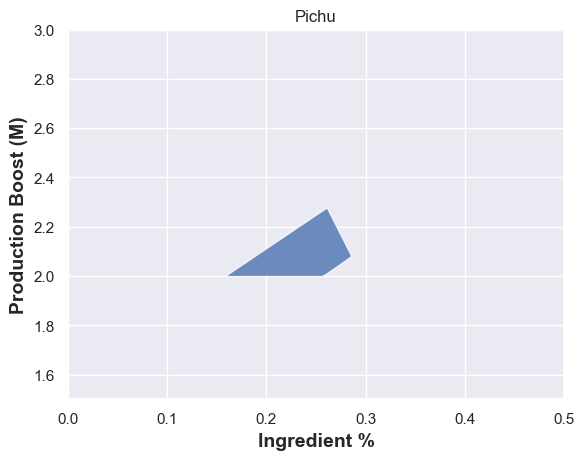

,ingredient%,energy_m
count,10055.000000,10055.000000
mean,0.213400,2.100755
std,0.022753,0.059466
min,0.162623,2.000038
25%,0.196099,2.050937
50%,0.214776,2.098100
75%,0.232209,2.145664
max,0.256182,2.247483


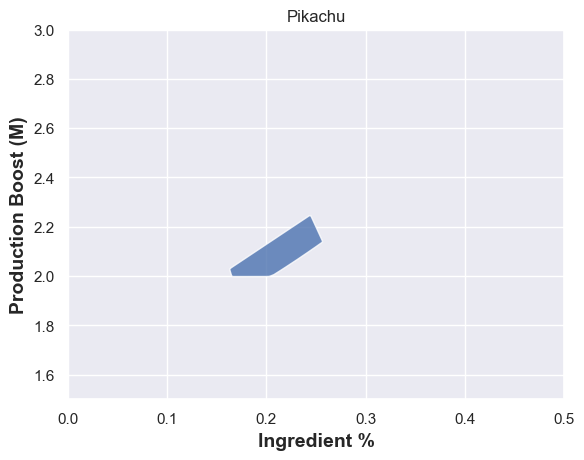

,ingredient%,energy_m
count,7133.000000,7133.000000
mean,0.238939,2.238383
std,0.017666,0.057650
min,0.204342,2.109232
25%,0.224032,2.194520
50%,0.239025,2.237782
75%,0.254063,2.282383
max,0.274351,2.371363


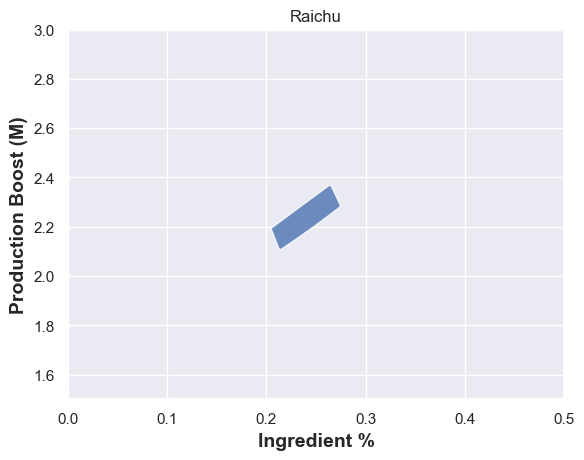

,ingredient%,energy_m
count,55541.000000,55541.000000
mean,0.160234,2.271908
std,0.041029,0.124682
min,0.083452,2.000023
25%,0.126624,2.177865
50%,0.158013,2.279923
75%,0.192764,2.369249
max,0.249894,2.499998


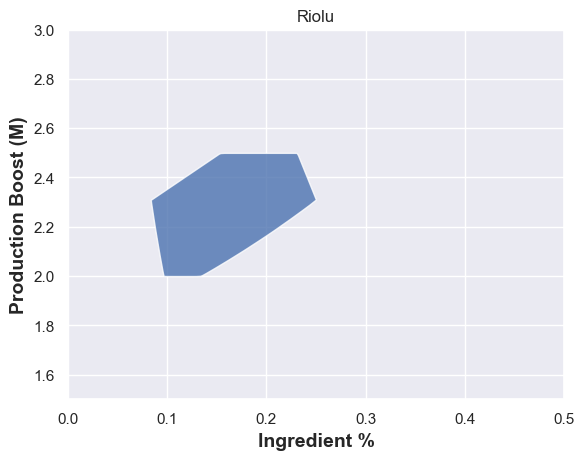

,ingredient%,energy_m
count,32134.000000,32134.000000
mean,0.272782,2.257535
std,0.022802,0.119098
min,0.220673,2.000036
25%,0.255729,2.164816
50%,0.272284,2.256072
75%,0.289561,2.352748
max,0.329005,2.499981


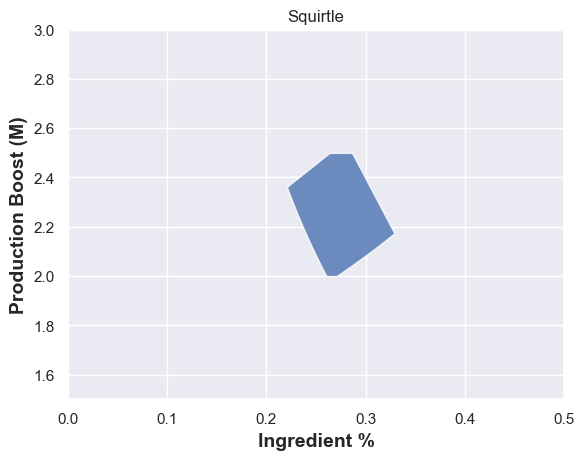

,ingredient%,energy_m
count,15381.000000,15381.000000
mean,0.294576,2.246793
std,0.015553,0.085785
min,0.257548,2.053292
25%,0.283100,2.180538
50%,0.294424,2.245621
75%,0.305827,2.313007
max,0.332991,2.448593


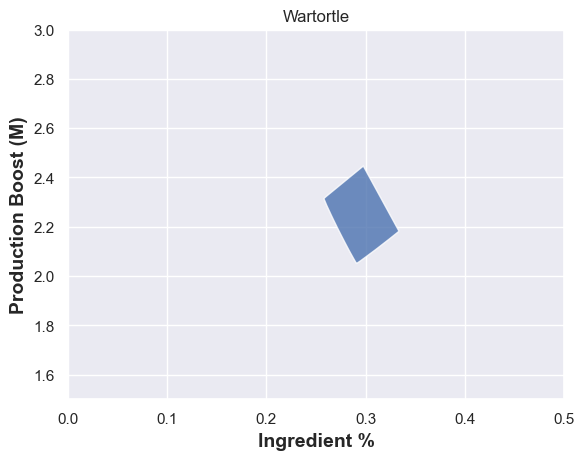

,ingredient%,energy_m
count,29711.000000,29711.000000
mean,0.127470,2.162966
std,0.031214,0.092980
min,0.062561,2.000023
25%,0.102558,2.090838
50%,0.130010,2.155114
75%,0.153708,2.228688
max,0.186876,2.411900


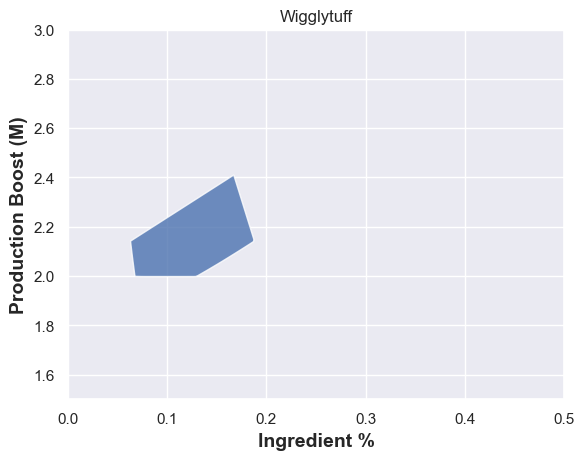

In [9]:
# Display individual Pokémon

all_portraits = []

for col in rnd_trials.columns:
    pts = get_valid_params([col]).copy()
    display(pts.describe())
    plot_group([col],pts)
    pts["group"] = col
    all_portraits.append(pts)



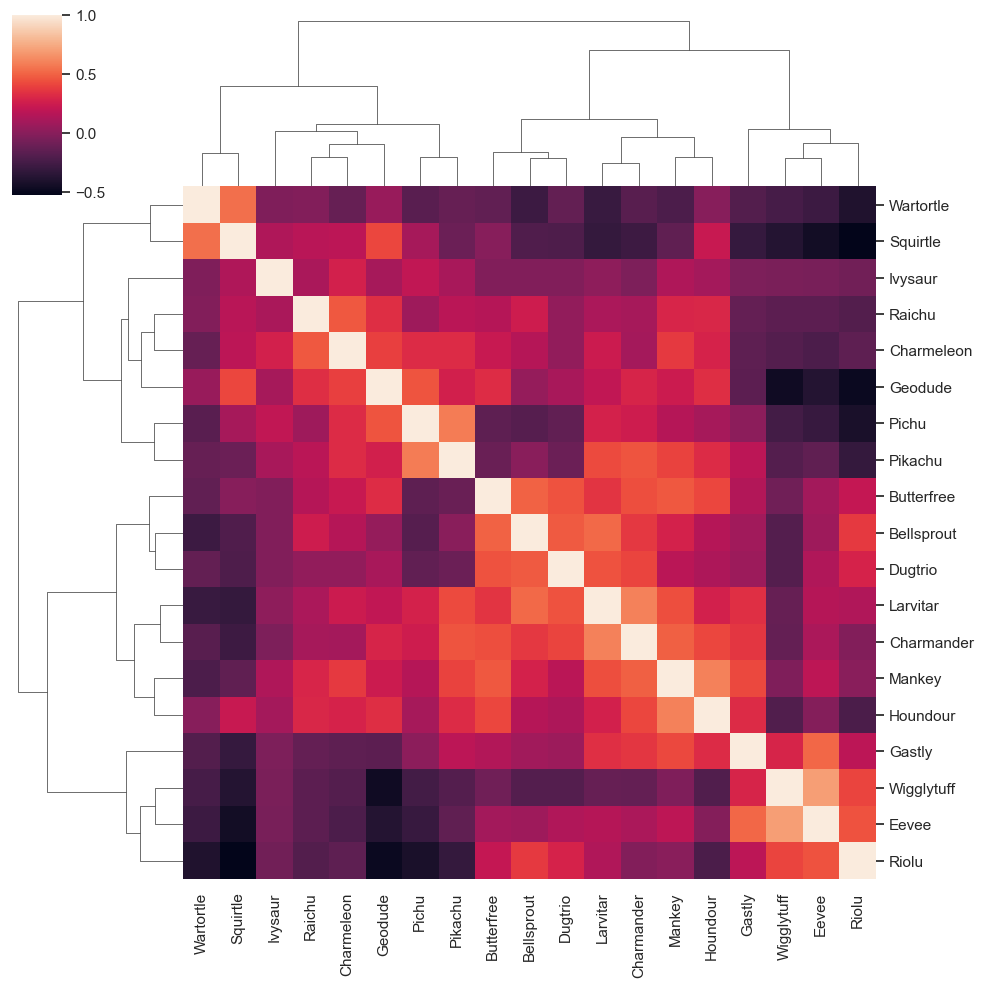

In [11]:
correl = rnd_trials.corr()

from scipy.cluster import hierarchy
linkage_matrix = hierarchy.linkage(correl, method='ward', metric='euclidean', optimal_ordering=True)

clust = sns.clustermap(correl, row_linkage=linkage_matrix, col_linkage=linkage_matrix)

In [12]:
def merge_ratio(a, b):
    
    # Count non zero before merge: a
    df = rnd_trials[a].copy()
    df = df.loc[(df!=0).all(axis=1)]
    size1 = len(df.index);
    
    # Count non zero before merge: b
    df = rnd_trials[b].copy()
    df = df.loc[(df!=0).all(axis=1)]
    size2 = len(df.index);
     
    if(size1==0 or size2==0): return 0;
    before = max(size1,size2)
    
    # Count non zero after merge
    df = rnd_trials[a + b].copy()
    df = df.loc[(df!=0).all(axis=1)]
    after = len(df.index);
       
    return after / before
    

In [13]:
# Here we keep merging into bigger cluster 
# while keeping intersection(a,b) above some fraction of max(a,b)

tresh = 0.15

n = len(correl.index)

output =  [None] * (2*n-1)

for i in range(0,n):
    output[i] = [correl.index[i]]

for i in range(0,n-1):
    
    a = int(linkage_matrix[i,0])   
    b = int(linkage_matrix[i,1])
    
    if output[a] == None or output[b] == None:
        output[n+i] = None
        continue

    if( merge_ratio(output[a], output[b]) > tresh):
        output[n+i] = output[a] + output[b]
        output[a] = None
        output[b] = None
        
    else:
        output[n+i] = None
    
output = list(filter(lambda x: x != None, output))

,ingredient%,energy_m
count,43542.000000,43542.000000
mean,0.247040,2.182074
std,0.033124,0.116131
min,0.176906,2.000017
25%,0.220914,2.083901
50%,0.248026,2.171584
75%,0.271521,2.266309
max,0.327110,2.489371


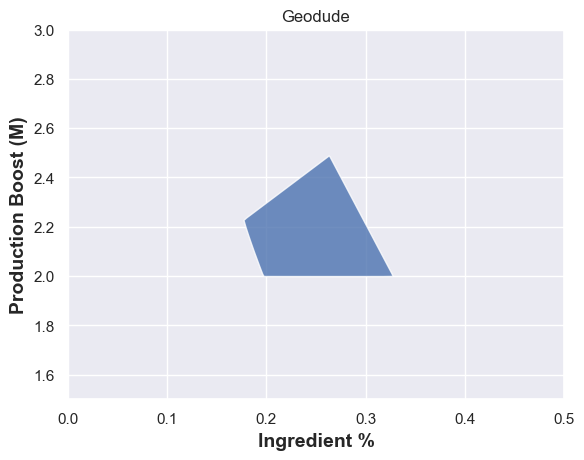

,ingredient%,energy_m
count,782.000000,782.000000
mean,0.249547,2.205824
std,0.005593,0.018490
min,0.238776,2.163876
25%,0.244994,2.191210
50%,0.249392,2.206522
75%,0.254309,2.220242
max,0.260289,2.248158


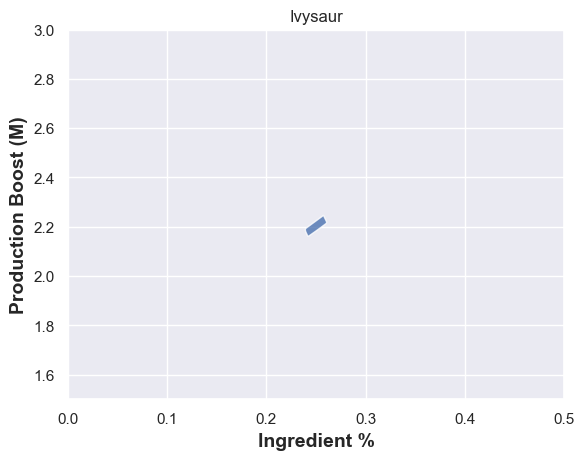

,ingredient%,energy_m
count,8255.000000,8255.000000
mean,0.215526,2.094752
std,0.021908,0.056597
min,0.163832,2.000038
25%,0.199390,2.046470
50%,0.217182,2.092631
75%,0.233567,2.139935
max,0.256182,2.231760


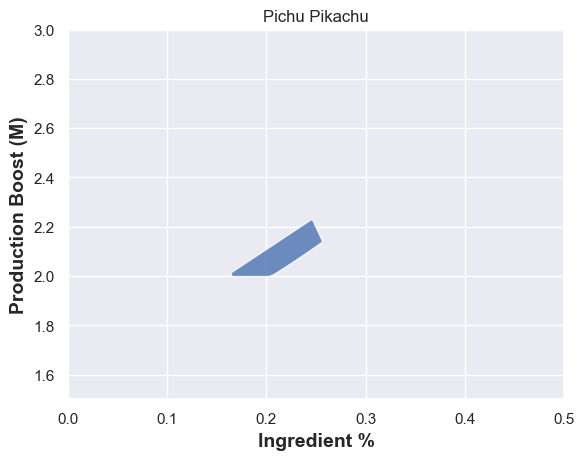

,ingredient%,energy_m
count,4246.000000,4246.000000
mean,0.235610,2.227968
std,0.010737,0.039531
min,0.213553,2.131671
25%,0.226598,2.200337
50%,0.235727,2.228899
75%,0.244477,2.256154
max,0.257755,2.325367


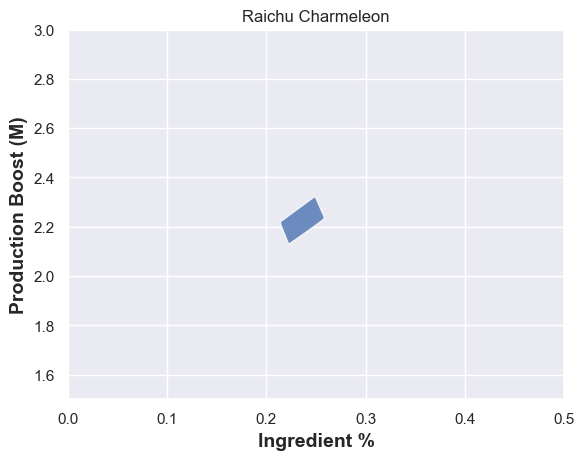

,ingredient%,energy_m
count,13844.000000,13844.000000
mean,0.292550,2.241636
std,0.014668,0.083548
min,0.257548,2.057192
25%,0.281797,2.176010
50%,0.292292,2.241107
75%,0.303100,2.306664
max,0.329005,2.433305


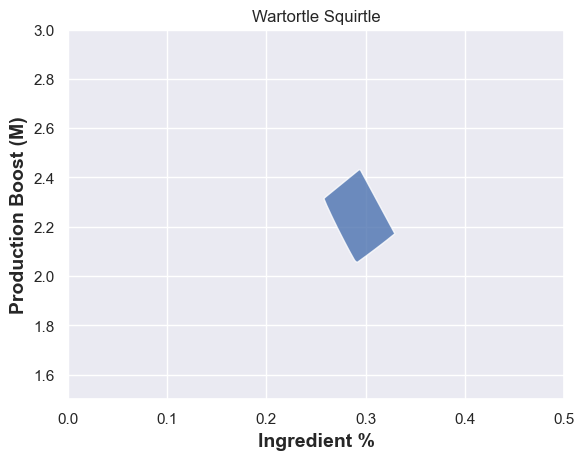

,ingredient%,energy_m
count,11175.000000,11175.000000
mean,0.153158,2.156693
std,0.016505,0.063806
min,0.120179,2.003900
25%,0.138931,2.111356
50%,0.153279,2.156620
75%,0.167064,2.202861
max,0.186876,2.310968


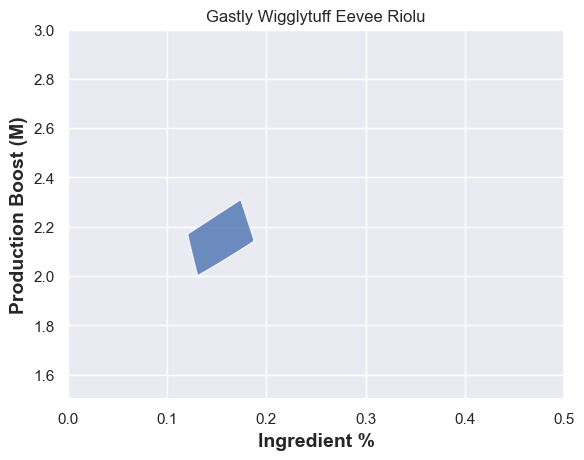

,ingredient%,energy_m
count,4602.000000,4602.000000
mean,0.203509,2.214958
std,0.010824,0.041422
min,0.181464,2.117812
25%,0.194402,2.184292
50%,0.203433,2.215234
75%,0.212534,2.244631
max,0.226316,2.313996


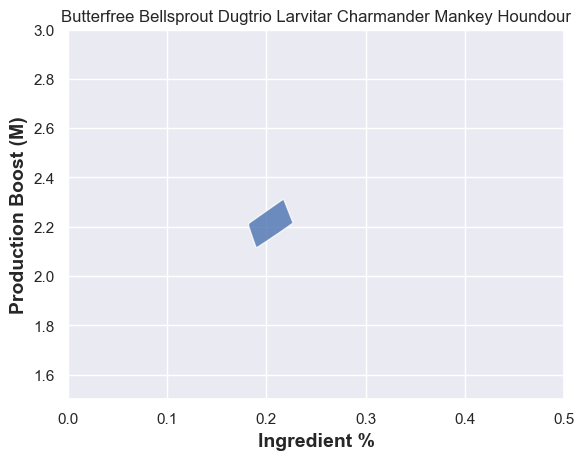

In [14]:

allpts = []

for group in output:
    pts = get_valid_params(group).copy()
    display(pts.describe())
    plot_group(group, pts)
    pts["group"] = " ".join(group)
    allpts.append(pts)

In [46]:
#allpts = sorted(allpts, key=lambda x: -len(x.index)) 
#tresh = np.percentile(list(map(lambda x: len(x.index), allpts)), 0.5)
#allpts = list(map(lambda x: x if len(x.index<tresh) else x.sample(tresh), allpts))

#df = pd.concat(allpts)

#fig, ax = plt.subplots()
#_ = sns.scatterplot(data=df,x="ingredient%", y="energy_m",alpha=0.5, hue="group", ax=ax) #hue_order=orders
#sns.move_legend(
#    ax, "lower center",
#    bbox_to_anchor=(.5, 1), ncol=1, title=None, frameon=False,
#)



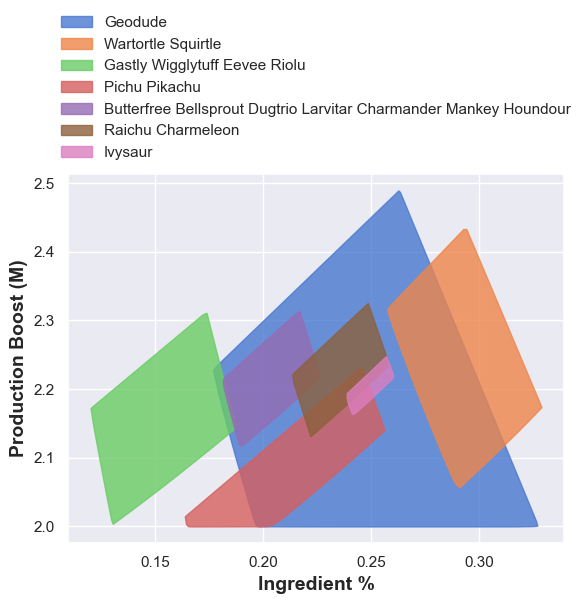

In [48]:
allpts = sorted(allpts, key=lambda x: -len(x.index)) 

fig, ax = plt.subplots()
_ = plt.xlabel("Ingredient %",fontweight ='bold', size=14);
_ = plt.ylabel("Production Boost (M)", fontweight ='bold',size=14);
#_ = ax.set_xlim(0.1, 0.35);
#_ = ax.set_ylim(1.95, 2.55);


handles, labels = plt.gca().get_legend_handles_labels()
palette = sns.color_palette(palette="muted", n_colors=8)
cidx = 0;

for pts in allpts:
    p = plot_hull(pts, ax, pts["group"].iloc[0], alpha=0.8, color = palette[cidx])
    cidx += 1
    handles.extend([p])

ax.autoscale()

_ = plt.legend(handles=handles)

sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(.5, 1), ncol=1, title=None, frameon=False,
)

fig.savefig('clusters-fs.png', transparent=False, bbox_inches='tight')
display(fig)
plt.close()

